# An Exploration of the Top 80 Tennis Player's

## Data Exploration and Validation

To start, install and import pandas and some visualization libraries.

In [ ]:
pip install -r requirements.txt

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tennis = pd.read_csv("tennis_player_data.csv")
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,total_service_points_won,1st_serve_return_won,2nd_serve_return_won,total_break_pts,break_pts_conv,return_games_played,return_games_won,return_points_won,total_pts_won,Unnamed: 21
0,Daniil Medvedev,8,Two-Handed Backhand,2845,1187,60,75,52,1897,63,...,66,31,54,2664,42,4238,26,39,52,NaN
1,Alexander Zverev,9,Two-Handed Backhand,3974,1973,65,74,50,2709,61,...,66,31,51,3631,42,6045,25,38,52,NaN
2,Novak Djokovic,19,Two-Handed Backhand,6440,2672,65,74,55,6017,66,...,67,34,55,10278,44,14179,32,42,54,NaN
3,Rafael Nadal,21,Two-Handed Backhand,3856,2066,68,72,57,6309,67,...,67,34,55,10943,45,14633,34,42,55,NaN
4,Casper Ruud,7,Two-Handed Backhand,986,461,65,72,54,1137,63,...,66,29,51,1424,41,2466,24,37,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,Two-Handed Backhand,4455,2722,52,74,45,4219,60,...,60,31,49,3853,40,6548,23,38,49,NaN
76,James Duckworth,12,Two-Handed Backhand,1096,398,56,72,50,1028,64,...,63,25,47,736,37,1719,16,33,48,NaN
77,Denis Kudla,12,Two-Handed Backhand,1078,637,58,70,51,1390,58,...,62,26,49,1109,40,2392,19,35,48,NaN
78,Tomas Martin Etcheverry,5,Two-Handed Backhand,35,23,71,64,45,98,61,...,58,27,51,58,34,121,17,36,47,NaN


In [ ]:
tennis = tennis.drop('Unnamed: 21', axis = 1)

The backhand column has 2 values 'One-Handed Backhand' and 'Two-Handed-Backhand' so we can make these numerical dummy values.

In [ ]:
tennis['backhand_type'] = tennis['backhand_type'].apply(lambda x: 2 if x.strip() == 'Two-Handed Backhand' else 1)

In [ ]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,service_games_won,total_service_points_won,1st_serve_return_won,2nd_serve_return_won,total_break_pts,break_pts_conv,return_games_played,return_games_won,return_points_won,total_pts_won
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,83,66,31,54,2664,42,4238,26,39,52
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,82,66,31,51,3631,42,6045,25,38,52
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,86,67,34,55,10278,44,14179,32,42,54
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,86,67,34,55,10943,45,14633,34,42,55
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,83,66,29,51,1424,41,2466,24,37,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,4455,2722,52,74,45,4219,60,...,74,60,31,49,3853,40,6548,23,38,49
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,78,63,25,47,736,37,1719,16,33,48
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,76,62,26,49,1109,40,2392,19,35,48
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,69,58,27,51,58,34,121,17,36,47


Notice that some columns are percentages and some are amounts. Percentages are a good metric to use to compare players, however these are career stats, so when comparing for example the amount of double faults a player has, we have to consider how many years they have been playing.

We can deal with this by averaging that number over the years a player has been active. This may not be ideal because players deal with injury, time-off, etc., but it is definitely an improvement

In [ ]:
amnt_columns = ['aces', 'double_faults','break_points_faced', 'service_games_played',
                'total_break_pts', 'return_games_played']

In [ ]:
for col in amnt_columns:
    tennis[f"avg_{col}_yr"] = tennis.apply(lambda x: x[col]/float(x['career_length']), axis = 1)

In [ ]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,return_games_played,return_games_won,return_points_won,total_pts_won,avg_aces_yr,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,4238,26,39,52,355.625000,148.375000,237.125000,528.750000,333.000000,529.750000
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,6045,25,38,52,441.555556,219.222222,301.000000,670.777778,403.444444,671.666667
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,14179,32,42,54,338.947368,140.631579,316.684211,767.263158,540.947368,746.263158
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,14633,34,42,55,183.619048,98.380952,300.428571,703.809524,521.095238,696.809524
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,2466,24,37,52,140.857143,65.857143,162.428571,361.285714,203.428571,352.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,4455,2722,52,74,45,4219,60,...,6548,23,38,49,297.000000,181.466667,281.266667,435.266667,256.866667,436.533333
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,1719,16,33,48,91.333333,33.166667,85.666667,144.083333,61.333333,143.250000
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,2392,19,35,48,89.833333,53.083333,115.833333,198.166667,92.416667,199.333333
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,121,17,36,47,7.000000,4.600000,19.600000,24.400000,11.600000,24.200000


### Serving

An ace is when a player serves and the other player can't return it. Usually the placement or speed is just out of reach of the player and he is simply unable to return the ball.

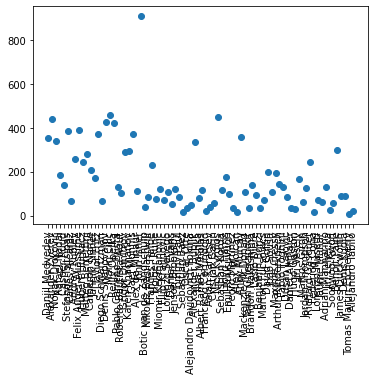

In [ ]:
plt.scatter(tennis["player"], tennis["avg_aces_yr"])
plt.xticks(rotation = 90)
plt.show()

The plat is a bit messy, but there is a general trend, most players tend to serve between 40 and 400 aces per year. This makes sense, especially since there is a slight negative relationship between ranking (right to left is rank 1 -80) and amount of aces.

There is one major outlier, serving an average of over 800 aces per year, lets explore some more.

In [ ]:
tennis.sort_values(by=['avg_aces_yr'], ascending = False)

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,return_games_played,return_games_won,return_points_won,total_pts_won,avg_aces_yr,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr
24,John Isner,15,2,13634,1674,69,79,56,2936,71,...,10371,10,30,51,908.933333,111.600000,195.733333,699.000000,234.733333,691.400000
16,Marin Cilic,17,2,7778,2521,57,77,52,4890,64,...,10660,23,38,52,457.529412,148.294118,287.647059,634.705882,369.176471,627.058824
44,Nick Kyrgios,9,2,4035,945,66,77,53,1279,67,...,3637,16,33,51,448.333333,105.000000,142.111111,405.555556,166.444444,404.111111
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,6045,25,38,52,441.555556,219.222222,301.000000,670.777778,403.444444,671.666667
15,Denis Shapovalov,5,1,2130,1370,59,76,52,1610,66,...,3350,19,36,51,426.000000,274.000000,322.000000,671.600000,344.200000,670.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Alejandro Tabilo,7,2,143,90,64,68,48,220,56,...,331,27,39,50,20.428571,12.857143,31.428571,49.571429,28.857143,47.285714
49,Alex Molcan,7,2,128,83,65,67,53,238,56,...,439,27,40,51,18.285714,11.857143,34.000000,63.428571,40.857143,62.714286
35,Sebastian Baez,4,2,65,61,73,64,53,286,60,...,457,28,40,50,16.250000,15.250000,71.500000,112.750000,79.750000,114.250000
69,Federico Coria,12,2,180,178,66,62,49,644,57,...,867,27,39,49,15.000000,14.833333,53.666667,71.166667,44.833333,72.250000


This may seem like an error, but it isn't. John Isner is widely known in the tennis community for having monster serves, sometimes he is referred to as a 'serve bot'. He has been active for 15 years, and has served 13,634 aces. He serves about 400 more aces per year than anyone else on tour.

Aces are only part of the equation, let's look at some other serving statistics.

Tennis players are given 2 serves for each point, if both go out this is called a 'double fault' and results in a loss of the point.

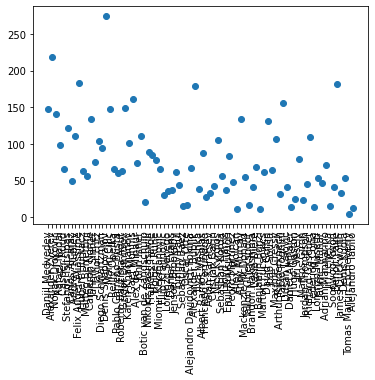

In [ ]:
plt.scatter(tennis["player"], tennis["avg_double_faults_yr"])
plt.xticks(rotation = 90)
plt.show()

There is a negative relationship with ranking and average double faults with some outliers.

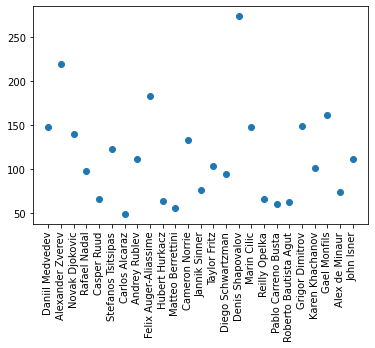

In [ ]:
plt.scatter(tennis.iloc[0:25]["player"], tennis.iloc[0:25]["avg_double_faults_yr"])
plt.xticks(rotation = 90)
plt.show()

The biggest outlier is Denis Shapovalov, there is no explanation other than nerves, etc. Alexander Zverev is another outlier, at rank 2 his double faults are quite high, he has a solid game if his serves do go in so that helps, and indicates that double faults aren't as important as other statistics.

In the end, it matters who is winning their service games, so lets take a look.

In [ ]:
tennis['total_service_games_won'] = tennis['service_games_played'] * 0.01*tennis['service_games_won']
tennis['avg_service_won_yr'] = tennis.apply(lambda x : x['total_service_games_won'] / float(x['career_length']), axis = 1)

tennis['total_return_games_won'] = tennis['return_games_played'] * 0.01*tennis['return_games_won']
tennis['avg_return_won_yr'] = tennis.apply(lambda x : x['total_return_games_won'] / float(x['career_length']), axis = 1)


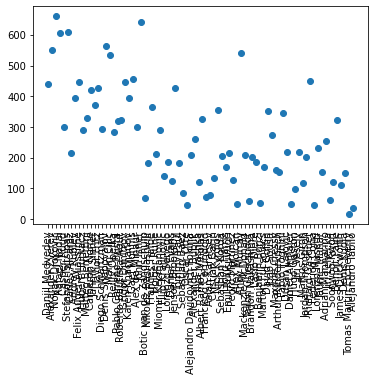

In [ ]:
plt.scatter(tennis["player"], tennis["avg_service_won_yr"])
plt.xticks(rotation = 90)
plt.show()

We see that signature negative relationship again, which makes sense. Let's zoom in on the top 30 where the pattern is less obvious.

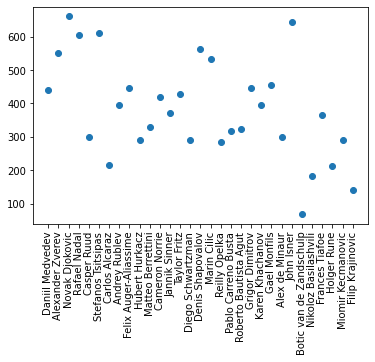

In [ ]:
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_service_won_yr"])
plt.xticks(rotation = 90)
plt.show()

We can see our old friend John Isner has stats similar to Novak Djokovic and Rafa Nadal, considered to be the best in the sport (maybe I'll add Roger Federer to the data later) due to his strong serving skills. This stat of course relies on the amount of matches played in a year, but to be in the top 30 you have to play a lot and win a lot.

The last serving statistic we will look at is break points saved. A break point is when the player you are serving against has the chance to win the game on your serve. A players ability to save these is a good reflection of how they handle pressure and if they can focus and stop their opponent.

In [ ]:
tennis['total_break_points_saved'] = tennis['break_points_faced'] * 0.01*tennis['break_points_saved']
tennis['avg_break_saved_yr'] = tennis.apply(lambda x : x['total_break_points_saved'] / float(x['career_length']), axis = 1)


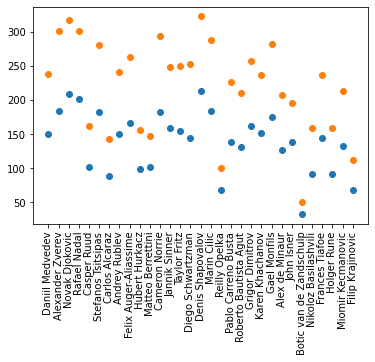

In [ ]:
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_break_saved_yr"])
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_break_points_faced_yr"])
plt.xticks(rotation = 90)
plt.show()

This shows the avg break points faced and the avg break points saved, but its hard to tell what's actually going on.

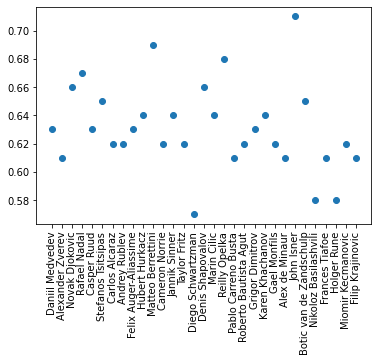

In [ ]:
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_break_saved_yr"]/tennis.iloc[0:31]["avg_break_points_faced_yr"])
plt.xticks(rotation = 90)
plt.show()

This plot shows the percentage of break points saved by the player, the highest percentage is.... John Isner! If he faces a break point he will just serve an ace and be right back in it! Some other notable players are Matteo Berrettini and Riley Opelka, if you recall, these players also have very good serves/ace rates, so this definitely helps with saving break points.

The lowest we see is Diego Schwartzman, I know his serve is pretty weak because he is one of the shortest players on tour, where John Isner is one of the tallest.

We have explored several metrics, and now I would like to quantify them into one, which would give me the ability to rank all the players based on their serves and service games.

- Aces
- Double Faults
- Service Games Won
- Break Points Saved

In [1]:
tennis

NameError: name 'tennis' is not defined

In [ ]:
tennis['serve_metric'] = tennis[''] + tennis[''] + tennis[''] + tennis['']

In [ ]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_aces_yr,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,total_games_played,avg_games_played_yr,total_service_games_won,total_return_games_won
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,355.625000,148.375000,237.125000,528.750000,333.000000,529.750000,8468,1058.500000,3510.90,1101.88
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,441.555556,219.222222,301.000000,670.777778,403.444444,671.666667,12082,1342.444444,4950.34,1511.25
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,338.947368,140.631579,316.684211,767.263158,540.947368,746.263158,28757,1513.526316,12537.08,4537.28
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,183.619048,98.380952,300.428571,703.809524,521.095238,696.809524,29413,1400.619048,12710.80,4975.22
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,140.857143,65.857143,162.428571,361.285714,203.428571,352.285714,4995,713.571429,2099.07,591.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,4455,2722,52,74,45,4219,60,...,297.000000,181.466667,281.266667,435.266667,256.866667,436.533333,13077,871.800000,4831.46,1506.04
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,91.333333,33.166667,85.666667,144.083333,61.333333,143.250000,3448,287.333333,1348.62,275.04
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,89.833333,53.083333,115.833333,198.166667,92.416667,199.333333,4770,397.500000,1807.28,454.48
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,7.000000,4.600000,19.600000,24.400000,11.600000,24.200000,243,48.600000,84.18,20.57


In [ ]:
tennis['total_games_played'] = tennis['service_games_played'] + tennis['return_games_played']

tennis['avg_games_played_yr'] = tennis.apply(lambda x : x['total_games_played'] / float(x['career_length']), axis = 1)


Let's try to see who finishes their matches the quickest. This will provide some insight on how easy a player can defeat their opponent, a reflection of their skill. We will only look at the top 40 players, because they will be more active on tour.

In [ ]:
tennis.iloc[:41].sort_values(by=['avg_games_played_yr'])

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,return_points_won,total_pts_won,avg_aces_yr,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,total_games_played,avg_games_played_yr
36,Oscar Otte,11,2,387,190,58,75,49,321,62,...,36,50,35.181818,17.272727,29.181818,56.909091,29.545455,56.818182,1251,113.727273
25,Botic van de Zandschulp,9,2,349,192,64,72,50,453,65,...,38,51,38.777778,21.333333,50.333333,86.333333,52.444444,87.666667,1566,174.000000
35,Sebastian Baez,4,2,65,61,73,64,53,286,60,...,40,50,16.250000,15.250000,71.500000,112.750000,79.750000,114.250000,908,227.000000
39,Ilya Ivashka,9,2,718,344,61,72,49,772,60,...,38,50,79.777778,38.222222,85.777778,155.888889,94.111111,155.222222,2800,311.111111
32,Daniel Evans,16,1,877,587,61,70,51,1530,61,...,38,50,54.812500,36.687500,95.625000,162.937500,92.937500,164.750000,5243,327.687500
30,Filip Krajinovic,14,2,988,420,64,68,51,1563,61,...,38,50,70.571429,30.000000,111.642857,184.714286,105.357143,184.857143,5174,369.571429
31,Lorenzo Sonego,9,2,983,320,65,72,51,1013,63,...,35,50,109.222222,35.555556,112.555556,226.222222,114.000000,224.666667,4058,450.888889
34,Tommy Paul,7,2,588,314,61,70,51,926,60,...,37,50,84.000000,44.857143,132.285714,235.857143,134.000000,235.571429,3300,471.428571
26,Nikoloz Basilashvili,14,2,1161,1239,59,68,49,2220,58,...,37,49,82.928571,88.500000,158.571429,250.214286,142.000000,251.071429,7018,501.285714
6,Carlos Alcaraz,4,2,267,196,64,70,54,569,62,...,41,53,66.750000,49.000000,142.250000,270.000000,199.500000,271.250000,2165,541.250000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b62d15e2-711d-4773-aa8c-7cdf1155e6fd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>